# RMSPROP

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
# READING SAMPLE DATA 
data = [[0.2,3.4],
        [0.4,3.8],
        [0.6,4.2],
        [0.8,4.6]] 
data

[[0.2, 3.4], [0.4, 3.8], [0.6, 4.2], [0.8, 4.6]]

In [6]:
data_x = []
data_y = []
for i in range(len(data)):
    data_x.append(data[i][0])
    data_y.append(data[i][1])
data_x = np.array(data_x)
data_y = np.array(data_y)

In [7]:
# initalising required variables
max_iters=10000
m=1.0
c=-1.0
Em=0.0
Ec=0.0
alpha=0.1
exp=10**(-8)
dm=0.0
dc=0.0
iter=1
error=[]
moment = 0.9

Training the Model

In [8]:
while (iter<=max_iters):
  err=0.0
  for i in range(4):
    gm=-1*(data_y[i]-(m*data_x[i])-c)*data_x[i]
    gc=-1*(data_y[i]-(m*data_x[i])-c)
    err+=(data_y[i]-m*data_x[i]-c)**2
    Em = moment*Em + (1-moment)*(gm**2)
    Ec = moment*Ec + (1-moment)*(gc**2)
    r1 = math.sqrt(Em + exp)
    r2 = math.sqrt(Ec + exp)
    dm = -1*(alpha/r1)*gm
    dc = -1*(alpha/r2)*gc
    m = m + dm
    c = c + dc
  error.append(err/8)
  iter=iter+1

In [9]:
# printing final model parameters
print(m,c)

2.11670501207852 3.1064021475283523


calculating mean square error

In [10]:
dd = 0
for i in range(4):
  dd+=(data_y[i]-(m*data_x[i])-c)**2
dd = dd/4
print(dd)

0.027825098864396398


# Visualising data and regression line

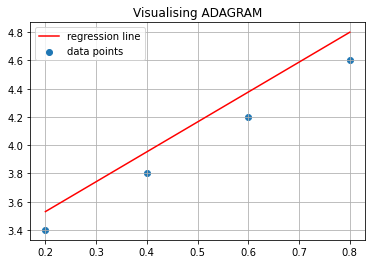

In [11]:
plt.scatter(data_x,data_y,label="data points")
plt.plot(data_x,m*data_x+c,color='red',label="regression line")
plt.title("Visualising ADAGRAM")
plt.grid()
plt.legend()
plt.show()

Error rate Analysis

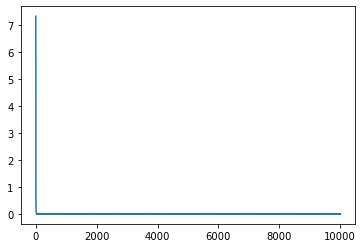

In [13]:
iters=np.arange(max_iters)
plt.plot(iters,error)
plt.show()